Brian Rikshpun 316132927


### Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import tree
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor




Q1) 
In this exercise you'll work with the [Wisconsin Breast Cancer](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`mean radius`) and its mean number of concave points (`mean concave points`).

a) 
- Import `load_breast_cancer` from sklearn.datasets.  
- Load breast cancer into `data` variable.
- Store data in `X` and target in `y`.  
Note class 0 corresponds to a malignant tumor and class 1 corresponds to a benign tumor. 
- Extract from `X` columns 0 ('mean radius') and 7 ('mean concave points') and store back in `X`.

In [2]:
data = load_breast_cancer()
#print (data)

X = data.data
X = X[:,[0,7]] #0 - Mean radius , 7 - Mean concave points
y = data.target

X = pd.DataFrame(X, columns=['mean radius', 'mean concave points'])
y = pd.DataFrame(y, columns= ['tumor'])


#print (X[:,[0,7]])
print (X.shape)
print (X)
print (y)


(569, 2)
     mean radius  mean concave points
0          17.99              0.14710
1          20.57              0.07017
2          19.69              0.12790
3          11.42              0.10520
4          20.29              0.10430
..           ...                  ...
564        21.56              0.13890
565        20.13              0.09791
566        16.60              0.05302
567        20.60              0.15200
568         7.76              0.00000

[569 rows x 2 columns]
     tumor
0        0
1        0
2        0
3        0
4        0
..     ...
564      0
565      0
566      0
567      0
568      1

[569 rows x 1 columns]


Q1)b)  
- Plot `mean concave points` vs. `mean radius`.  
- Calculate two coolean mask arrays `mask_benign` and `mask_malignant`.
- Plot the benign data points as blue squares, and the malignant data points as red triangles.  
- Add a figure title, axis labels, and a legend.

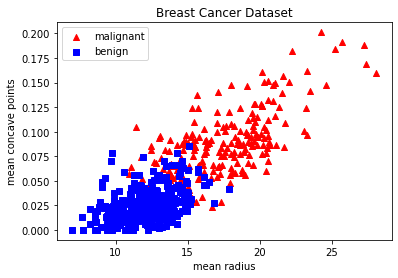

In [3]:

X_0 = X[y['tumor'] == 0]
X_1 = X[y['tumor'] == 1]

plt.scatter(X_0['mean radius'],X_0['mean concave points'],c = 'r', marker = '^', label = 'malignant' )
plt.scatter(X_1['mean radius'],X_1['mean concave points'],c = 'b', marker = 's', label = 'benign')

plt.title("Breast Cancer Dataset")
plt.xlabel("mean radius")
plt.ylabel("mean concave points")
plt.legend(loc = "upper left")

# colormap = np.array(['r','b'])
# markermap = np.array(['^','s'])

# plt.scatter(X['mean radius'],X['mean concave points'],c =colormap[y['tumor']])


plt.show()

Q1)c)  
- Split the data into 80% train and 20% test. The feature matrices are assigned to `X_train` and `X_test`, while the arrays of labels are assigned to `y_train` and `y_test`. Set `stratify` to `y` and in order to obtain reproducible results, set `random_state` to 1.
- Instantiate a DecisionTreeClassifier `dt` of maximum depth equal to `2`.
- Fit `dt` to the training set.
- Predict the test set labels and assign the result to `y_pred`.
- Evaluate the test set accuracy score of `dt` by calling `accuracy_score()` and assign the value to `acc`.

In [5]:
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Test set accuracy = " , accuracy_score(y_pred,y_test))

#print(y_pred.reshape(-1,1).shape)
#print(y_test.shape)


Test set accuracy =  0.9210526315789473


Q1)d)  
Plot the tree using `tree.plot_tree`

[Text(334.8, 362.4, 'mean concave points <= 0.049\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(167.4, 217.44, 'mean radius <= 15.025\ngini = 0.091\nsamples = 273\nvalue = [13, 260]'),
 Text(83.7, 72.47999999999996, 'gini = 0.038\nsamples = 258\nvalue = [5, 253]'),
 Text(251.10000000000002, 72.47999999999996, 'gini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(502.20000000000005, 217.44, 'mean radius <= 15.16\ngini = 0.237\nsamples = 182\nvalue = [157, 25]'),
 Text(418.5, 72.47999999999996, 'gini = 0.477\nsamples = 56\nvalue = [34, 22]'),
 Text(585.9, 72.47999999999996, 'gini = 0.046\nsamples = 126\nvalue = [123, 3]')]

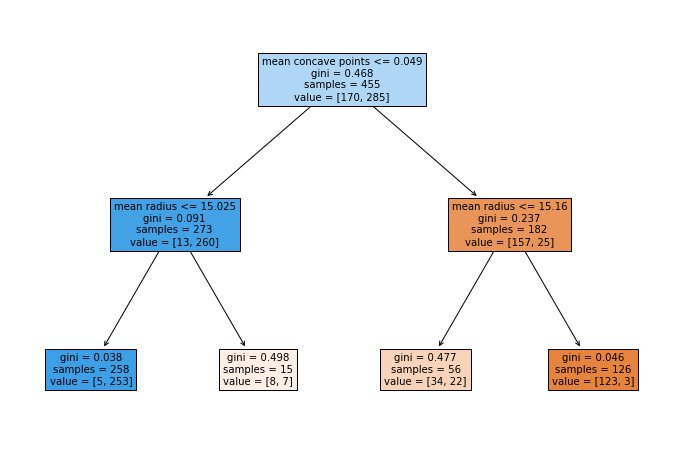

In [6]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt,feature_names=X.columns, filled = True)

Q1)e)  
Plot decision regions:  
- Find the minimum and maximum of the two features `'mean radius'` and `'mean concave points'`.  
- Create a `50x50` meshgrid of points using `np.meshgrid` and  `np.linspace`.  
- Predict the classes for all grid points and store in variable `'Z'`.  
- Call `contourf` function with colormap `plt.cm.RdBu` to plot the decision regions
- Call `scatter` to plot the data points.

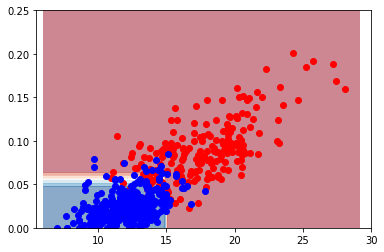

In [8]:


x_min, x_max = X['mean radius'].min() - 1, X['mean radius'].max() + 1
y_min, y_max = X['mean concave points'].min() - 1, X['mean concave points'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                     np.linspace(y_min, y_max,100))

#f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))


Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, cmap = plt.cm.RdBu, alpha = 0.5)
plt.scatter(X_0['mean radius'],X_0['mean concave points'],c = 'r' )
plt.scatter(X_1['mean radius'],X_1['mean concave points'],c = 'b')

plt.xlim(5.5,30)
plt.ylim(0,0.25)

plt.show()



Q2) 
In this exercise, you'll train a regression tree to predict the 'mpg' (miles per gallon) consumption of cars in the auto-mpg dataset using the displacement feature 'displ'.

a) 
- Read 'auto.csv' into a dataframe 'df'.  
- Store the displacement feature `'disp'` in a column array `X`, and `'mpg'` column in a column array `y`. (You may want to  use pandas `values` attribute and numpy's array `reshape` method.)

In [9]:
df = pd.read_csv('auto.csv')  

X = df['displ'].to_numpy().reshape(-1,1)
y = df['mpg'].to_numpy().reshape(-1,1)

print(X.shape)
print(y.shape)

#display(df)


(392, 1)
(392, 1)


Q2)b)  
- Plot 'mpg' vs. 'displ' using seaborn's `scatterplot`.  

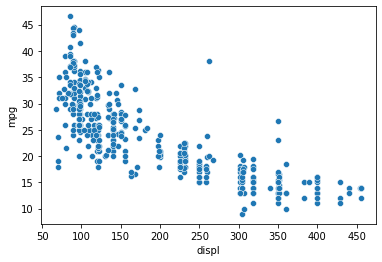

In [10]:
 sns.scatterplot(data = df, x = 'displ', y = 'mpg')
 
 #sns.scatterplot(data = df, x = df[df.columns[pos]], y = 'Happiness', hue = 'Region', ax = axes[pos3], legend = False)

Q2)c)  
- Split the data into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test. Set 'random_state' to 3.
- Instantiate a DecisionTreeRegresor dt of `'max_depth'` equal to `4`, `'min_samples_leaf'` equal to 10% of training data, and `'random_state'` to `3`.
- Fit `dt` to the training set.
- Predict the test set labels and assign the result to `y_pred`.
- Evaluate the test set MSE of dt by calling `mean_squared_error()` function and assign the value to `mse_dt`. Calculate the root mean squared error RMSE by raising MSE to the power of 1/2, and store it in variable `'rmse_dt'` and print it.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 3)

dt = DecisionTreeRegressor(max_depth= 4 , min_samples_leaf = 0.1 , random_state=3)

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

mse_dt = mean_squared_error(y_test,y_pred)

rmse_dt = np.power(mse_dt,0.5)

print("MSE : " , mse_dt)
print("RMSE : " , rmse_dt)


MSE :  26.033535588548414
RMSE :  5.102306888903137


Q2)d)  
Plot regression line:  
- Find the minimum and maximum of the `'displ'` feature.  
- Create 100 evenly spaced points between min and max `'displ'` feature values using `np.linspace`.  
- Predict the values for all points and store in variable `'y1_pred'`.  
- Plot `'y1_pred'` line in red with line width of 5.
- Call `scatter` to plot the data points.
- Add a figure title, axis labels, and a legend.

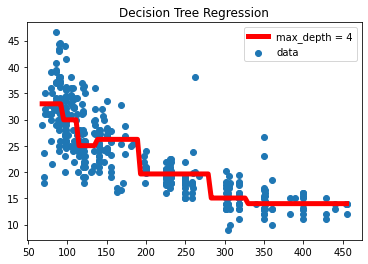

In [12]:
min_disp = min(df['displ'])
max_disp = max(df['displ'])

onehp = np.linspace(min_disp,max_disp,100)

y1_pred = dt.predict(onehp.reshape(-1,1))


plt.scatter(df['displ'], df['mpg'], label = "data")
plt.plot(onehp, y1_pred, c = 'red', linewidth = 5, label = "max_depth = 4")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


Q3)  
In this exercise you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

a) 
- Read 'bikes.csv' into a dataframe `'df'`.
- Store the `'cnt'` column in target `y`, and all other columns in dataframe `X` (drop `'cnt'` column from `'df'`).
- Display head of DataFrames `'df'`, `'X'`, and Series `'y'`.

In [14]:
df = pd.read_csv('bikes.csv')  

X = df.drop(['cnt'], axis=1)
y = df['cnt']

X.head()
y.head()
df.head()


,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


Q3)c)

- Split the data into 80% train and 20% test. The feature matrices are assigned to `X_train` and `X_test`, while the arrays of labels are assigned to `y_train` and `y_test`. Set `'random_state'` to `2`.  
- Instantiate the RF regressor with `25` trees, and assign to variable `'rf'`.  
- Fit RF regressor to the training set.  
- Predict the test set values using `'rf'` and assign the result to `y_pred`.  
- Evaluate the test set RMSE of rf by calling `mean_squared_error()` and raising it to the power of 1/2, assign the value to `rmse_test`, and print that value.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

rf = RandomForestRegressor(n_estimators=25)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

mse_dt = mean_squared_error(y_test,y_pred)
rmse_dt = np.power(mse_dt,0.5)

print("Test st RMSE of rf : " , rmse_dt)


Test st RMSE of rf :  54.87313930740307


Q3)d)  
In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in part c).  
For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf.  
- Create a `pandas.Series` object called `importances` containing the feature names (`X_train.columns`) as `index` and their importances (`rf.feature_importances_`) as data.
- Call the `.sort_values()` method on `importances` and assign the result to `importances_sorted`.
- Call the `.plot()` method on `importances_sorted` and set the arguments:
  - `kind` to `'barh'`
  - `color` to `'lightgreen'`

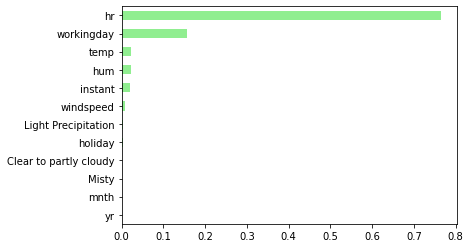

In [16]:
importances = pd.Series(rf.feature_importances_, index = X.columns)
sorted_importances = importances.sort_values()
sorted_importances.plot(kind = 'barh' , color = 'lightgreen')
plt.show()